<a href="https://colab.research.google.com/github/Gargee07/Employee-Retention-Prediction-Model/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: importing the data

In [ ]:
import pandas as pd

hr_df = pd.read_csv('hr_data.csv')
print(hr_df)

       employee_id  number_project  average_montly_hours  time_spend_company  \
0             1003               2                   157                   3   
1             1005               5                   262                   6   
2             1486               7                   272                   4   
3             1038               5                   223                   5   
4             1057               2                   159                   3   
...            ...             ...                   ...                 ...   
14994        87670               2                   151                   3   
14995        87673               2                   160                   3   
14996        87679               2                   143                   3   
14997        87681               6                   280                   4   
14998        87684               2                   158                   3   

       Work_accident  left  promotion_l

In [ ]:
hr_df.shape

(14999, 9)

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
#loading employee satisfaction value
employee_satisfaction_df = pd.read_excel('employee_satisfaction_evaluation.xlsx')
print(employee_satisfaction_df)

       EMPLOYEE #  satisfaction_level  last_evaluation
0            1003                0.38             0.53
1            1005                0.80             0.86
2            1486                0.11             0.88
3            1038                0.72             0.87
4            1057                0.37             0.52
...           ...                 ...              ...
14994       87670                0.40             0.57
14995       87673                0.37             0.48
14996       87679                0.37             0.53
14997       87681                0.11             0.96
14998       87684                0.37             0.52

[14999 rows x 3 columns]


In [ ]:
#merging the tables
main_df = hr_df.set_index('employee_id').join(employee_satisfaction_df.set_index('EMPLOYEE #'))
print(main_df)

             number_project  average_montly_hours  time_spend_company  \
employee_id                                                             
1003                      2                   157                   3   
1005                      5                   262                   6   
1486                      7                   272                   4   
1038                      5                   223                   5   
1057                      2                   159                   3   
...                     ...                   ...                 ...   
87670                     2                   151                   3   
87673                     2                   160                   3   
87679                     2                   143                   3   
87681                     6                   280                   4   
87684                     2                   158                   3   

             Work_accident  left  promotion_last_5

In [ ]:
main_df = main_df.reset_index()

In [ ]:
print(main_df)
# column employee_id is also reconized now

       employee_id  number_project  average_montly_hours  time_spend_company  \
0             1003               2                   157                   3   
1             1005               5                   262                   6   
2             1486               7                   272                   4   
3             1038               5                   223                   5   
4             1057               2                   159                   3   
...            ...             ...                   ...                 ...   
14994        87670               2                   151                   3   
14995        87673               2                   160                   3   
14996        87679               2                   143                   3   
14997        87681               6                   280                   4   
14998        87684               2                   158                   3   

       Work_accident  left  promotion_l

Step 2 : Numerical Analysis of Data

In [ ]:
main_df.info()
# check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [ ]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [ ]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)

In [ ]:
main_df['last_evaluation'].fillna(main_df['last_evaluation'].mean(),inplace=True)

In [ ]:
print(main_df)

       employee_id  number_project  average_montly_hours  time_spend_company  \
0             1003               2                   157                   3   
1             1005               5                   262                   6   
2             1486               7                   272                   4   
3             1038               5                   223                   5   
4             1057               2                   159                   3   
...            ...             ...                   ...                 ...   
14994        87670               2                   151                   3   
14995        87673               2                   160                   3   
14996        87679               2                   143                   3   
14997        87681               6                   280                   4   
14998        87684               2                   158                   3   

       Work_accident  left  promotion_l

In [ ]:
# dropping employee id column
main_df.drop(columns='employee_id',inplace=True)

In [ ]:
# how many employees working in each deaprtment
main_df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [ ]:
main_df.groupby('department')[['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation']].sum()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [ ]:
main_df.groupby('department')[['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation']].mean()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [ ]:
# how many employees in total left according the given previous data
main_df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

Data Visiualization

In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

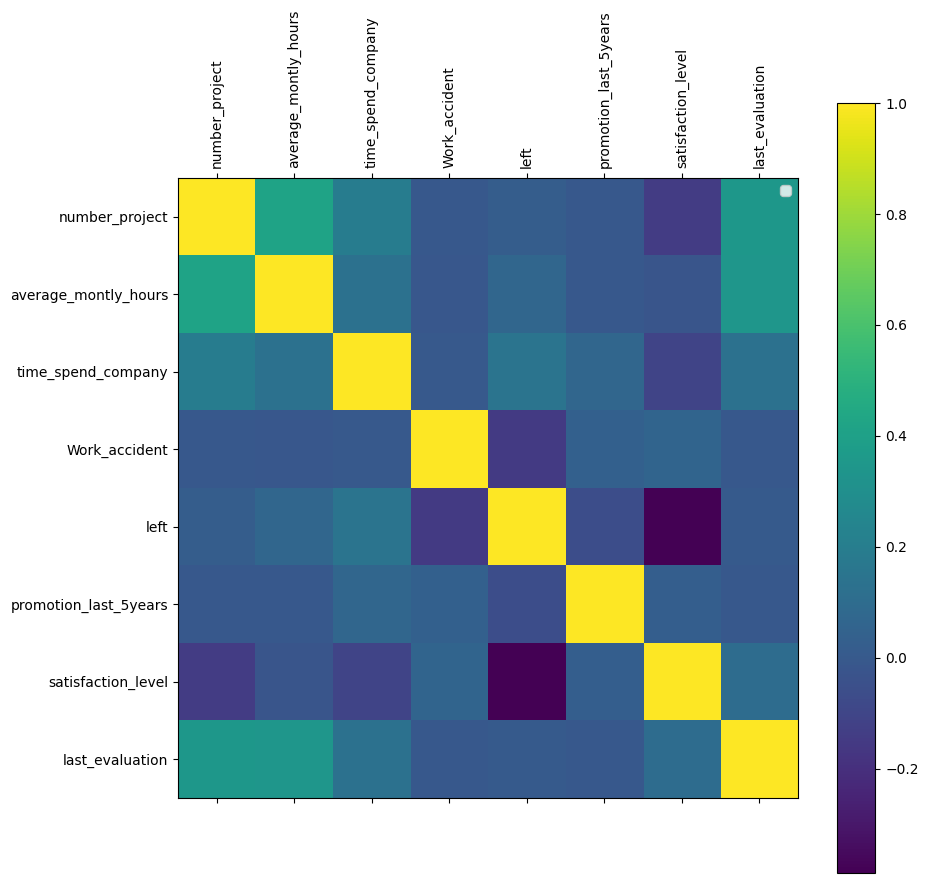

In [ ]:
def plot_correlation(df,size=10):
  # Exclude 'sales' column from the correlation calculation
  df_without = main_df.drop(columns=['salary' , 'department'])
  correlation = df_without.corr()
  fig,ax = plt.subplots(figsize=(size,size))
  ax.legend()
  cax=ax.matshow(correlation)
  fig.colorbar(cax)
  plt.xticks(range(len(correlation.columns)),correlation.columns,rotation='vertical')
  plt.yticks(range(len(correlation.columns)),correlation.columns)


plot_correlation(main_df)


from above correlation graph:
1 no. of people left the company is very highly correlated with the satisfaction
2. left & work_accidents (good correlation)
3. satisfation & no> of projects (good correlation)
4. left & time_spend_comapny (moderately correalated)

<Axes: xlabel='left', ylabel='satisfaction_level'>

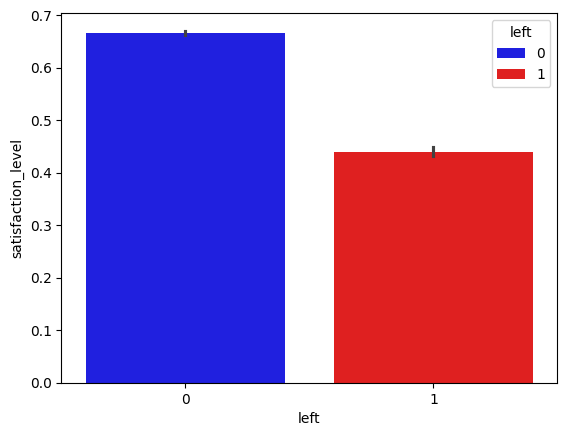

In [ ]:
# bar plot

palette_colors = {0: 'blue', 1: 'red'}

# Create the bar plot
sns.barplot(x='left', y='satisfaction_level', data=main_df, hue='left', palette=palette_colors)

<Axes: xlabel='promotion_last_5years', ylabel='satisfaction_level'>

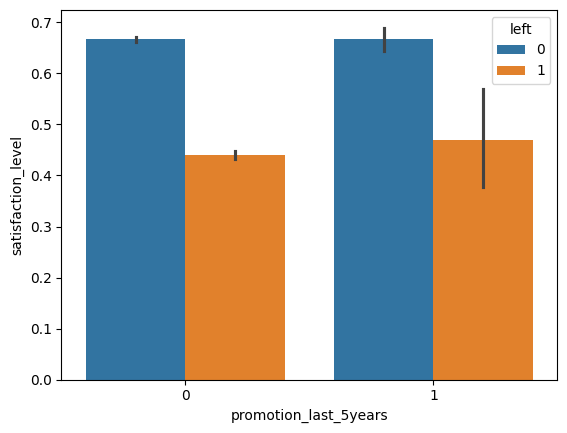

In [ ]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level', data=main_df , hue ='left')

# hence there is not much dependency on promotion_last 5 years for satisfaction as well on left

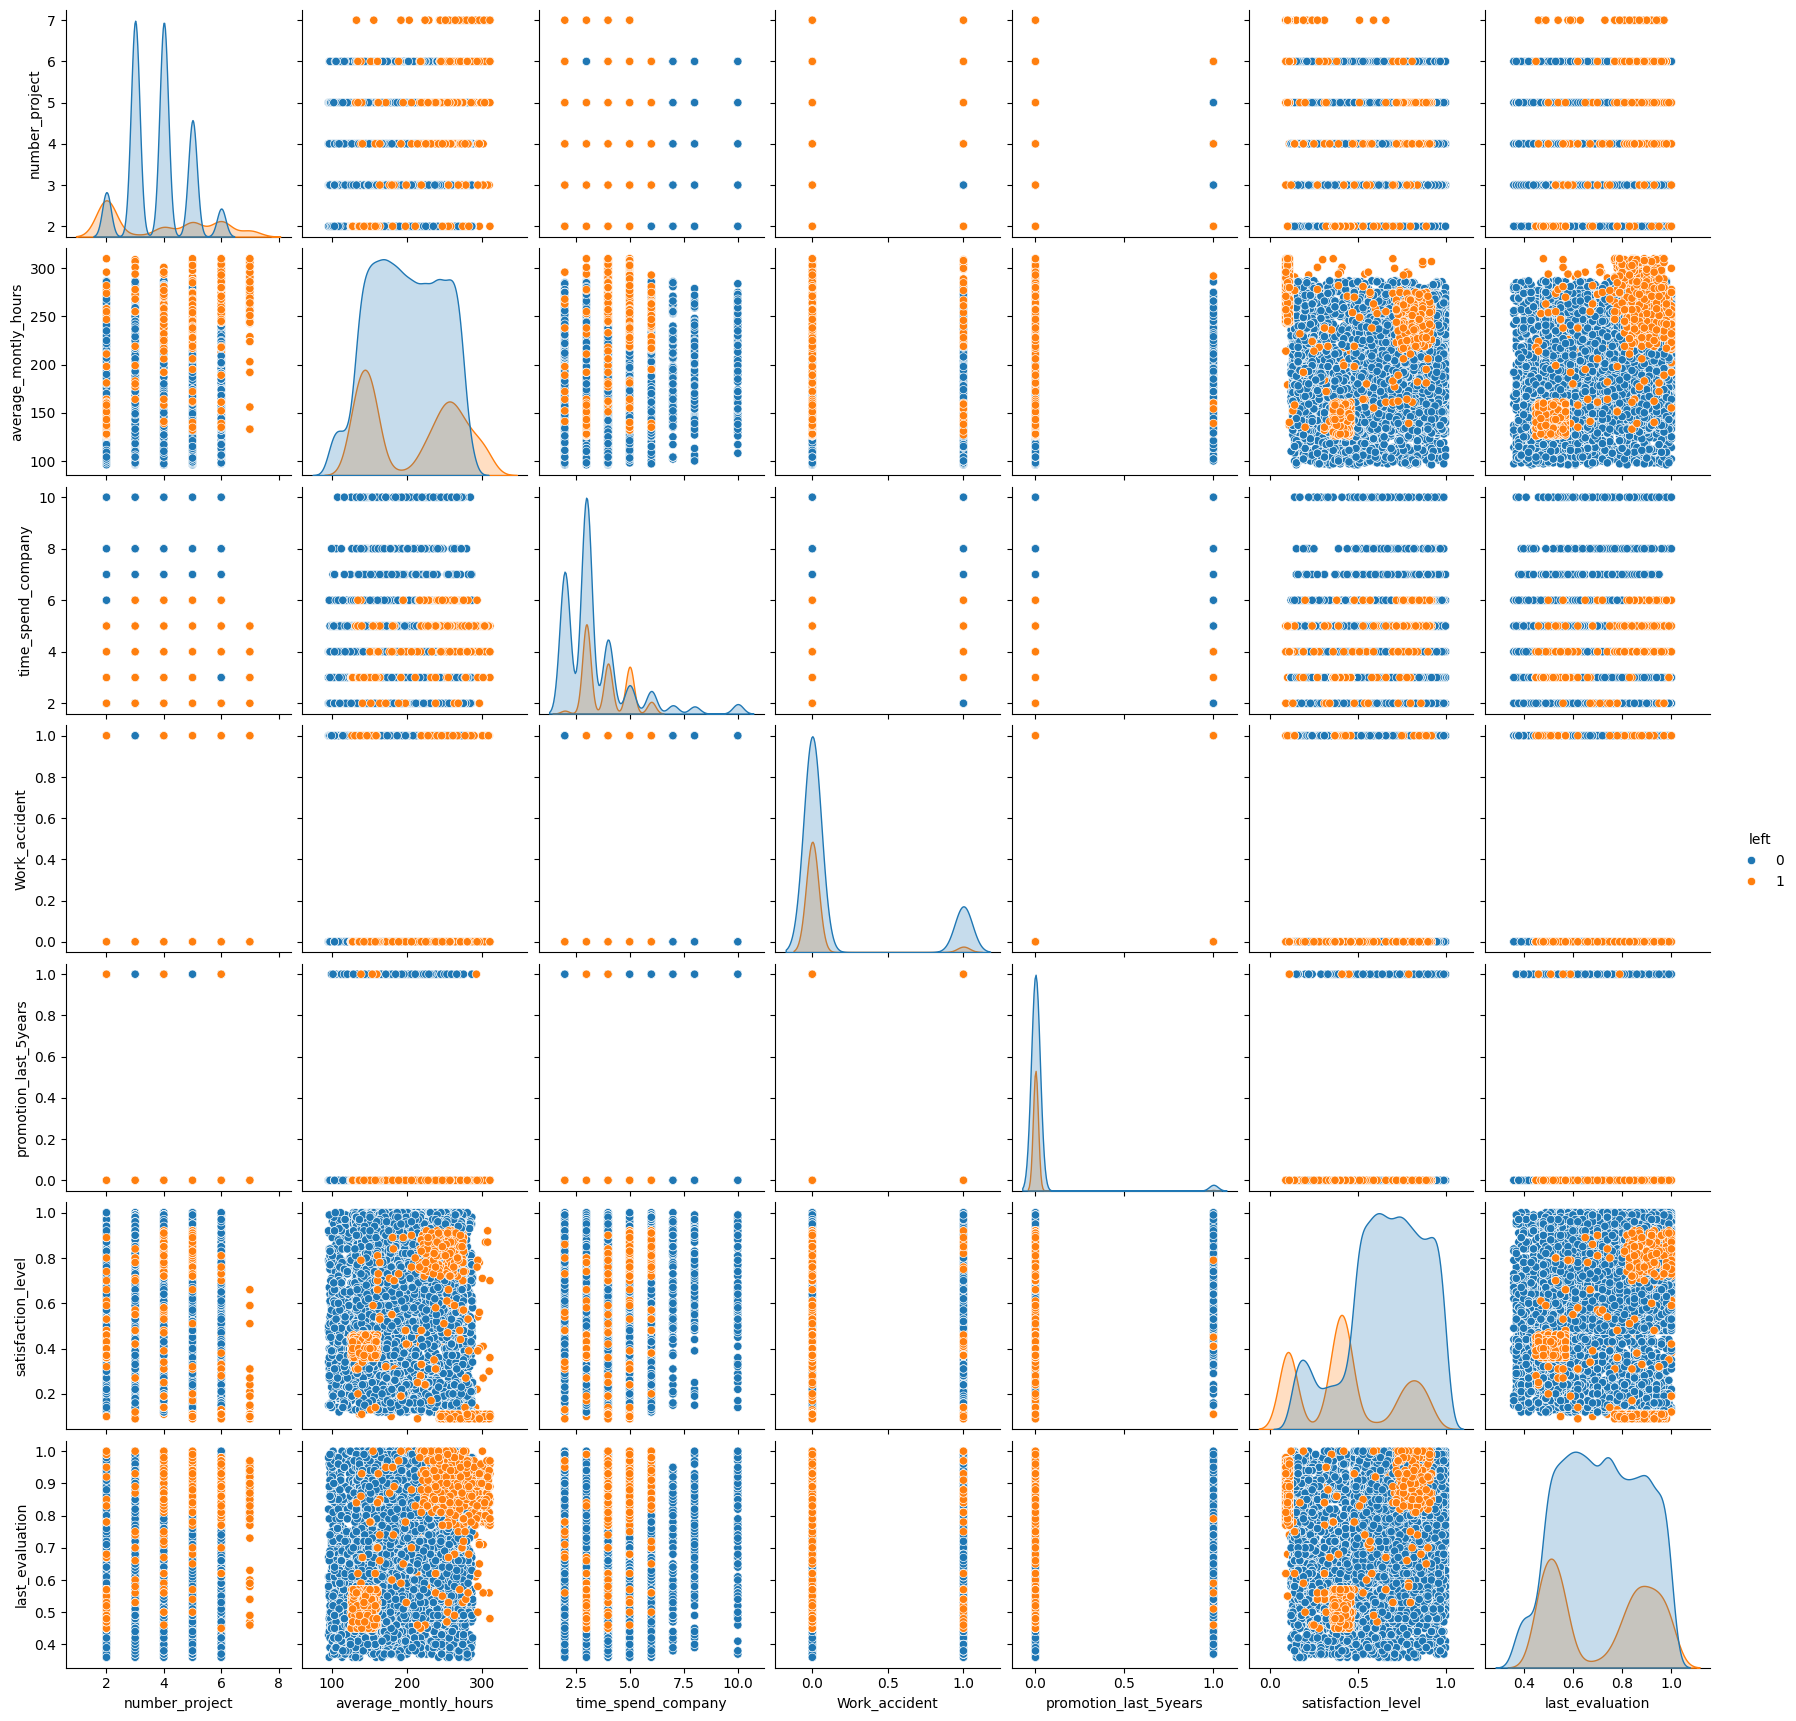

In [ ]:
sns.pairplot(main_df,hue='left')

Data Preprocessing

In [ ]:
# coverting label data to numerical data

y = main_df[['department','salary']]
y

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
k = le.fit_transform(main_df['salary'])


In [ ]:
# creating new column for numerical salary rep
main_df['salary_num']=k

main_df.loc[main_df['salary']=='high']


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [ ]:
# dropping salary column
main_df.drop(['salary'],axis=1,inplace=True)

In [ ]:
# repeating same for department column
z = le.fit_transform(main_df['department'])
z


array([7, 7, 7, ..., 8, 8, 8])

In [ ]:
# creating new column department_num

main_df['department_num']=z

main_df.loc[main_df['department']=='RandD']

# sales =7 , 'accounting'=2, 'hr'=3, 'technical'=9, 'support'=8, 'management'=4,
       #'IT'=0, 'product_mng'=6, 'marketing'=5, 'RandD'=1


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num,department_num
301,3,278,4,0,1,0,RandD,0.12,1.00,2,1
302,7,250,5,0,1,0,RandD,0.10,0.77,2,1
303,2,127,3,0,1,0,RandD,0.37,0.55,2,1
304,5,255,5,0,1,0,RandD,0.89,0.87,2,1
305,2,135,3,0,1,0,RandD,0.45,0.47,2,1
...,...,...,...,...,...,...,...,...,...,...,...
14939,4,273,5,0,1,0,RandD,0.85,0.87,2,1
14940,5,285,4,1,1,0,RandD,0.10,0.78,2,1
14941,2,131,3,0,1,0,RandD,0.43,0.49,0,1
14942,5,135,6,0,1,0,RandD,0.20,0.50,1,1


In [ ]:
#droppiing department column
main_df.drop(['department'],axis=1,inplace=True)

In [ ]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,1,8
14995,2,160,3,0,1,0,0.37,0.48,1,8
14996,2,143,3,0,1,0,0.37,0.53,1,8
14997,6,280,4,0,1,0,0.11,0.96,1,8


spliting data in training and testing

In [ ]:
X = main_df.drop(['left'],axis=1)
X

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,0.40,0.57,1,8
14995,2,160,3,0,0,0.37,0.48,1,8
14996,2,143,3,0,0,0.37,0.53,1,8
14997,6,280,4,0,0,0.11,0.96,1,8


In [ ]:
Y = main_df['left']
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
# checking for knn
# Data Preprocessing for it

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

MODEL SELECTION

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train_std,Y_train)
lor_prediction = lor.predict(X_test_std)
lor_accuracy = accuracy_score(Y_test , lor_prediction)*100
print(lor_accuracy)

76.88888888888889


[96.42222222222222, 96.24444444444444, 95.42222222222222, 95.35555555555555, 95.15555555555557, 95.51111111111112, 95.17777777777778, 95.22222222222221, 95.08888888888889, 95.0, 94.71111111111111, 94.84444444444445, 94.55555555555556, 94.68888888888888, 94.33333333333334, 94.39999999999999, 94.11111111111111, 94.11111111111111, 93.97777777777779, 94.08888888888889, 93.95555555555556, 93.97777777777779, 93.82222222222222, 93.77777777777779, 93.71111111111111]


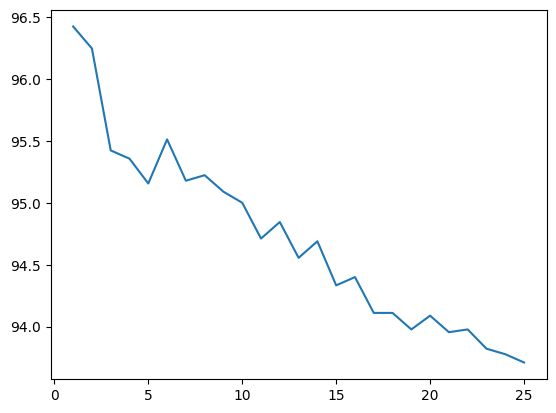

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_std,Y_train)
  prediction_knn = knn.predict(X_test_std)
  scores[k]=accuracy_score(Y_test , prediction_knn)*100
  scores_list.append(accuracy_score(Y_test,prediction_knn)*100)
print(scores_list)
plt.plot(k_range , scores_list)

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#train the data
dt.fit(X_train , Y_train)
prediction_dt = dt.predict(X_test)
prediction_dt.size
dt_accuracy = accuracy_score(Y_test , prediction_dt)*100
print(dt_accuracy)

97.46666666666667


In [ ]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_prediction = rf.predict(X_test)
rf_accuracy = accuracy_score(Y_test , rf_prediction)*100


In [ ]:
print(rf_accuracy)

98.77777777777777


            Classifier  Accuracy (%)
0  Logistic Regression     76.888889
1                  KNN     96.422222
2        Decision Tree     97.466667
3        Random Forest     98.777778


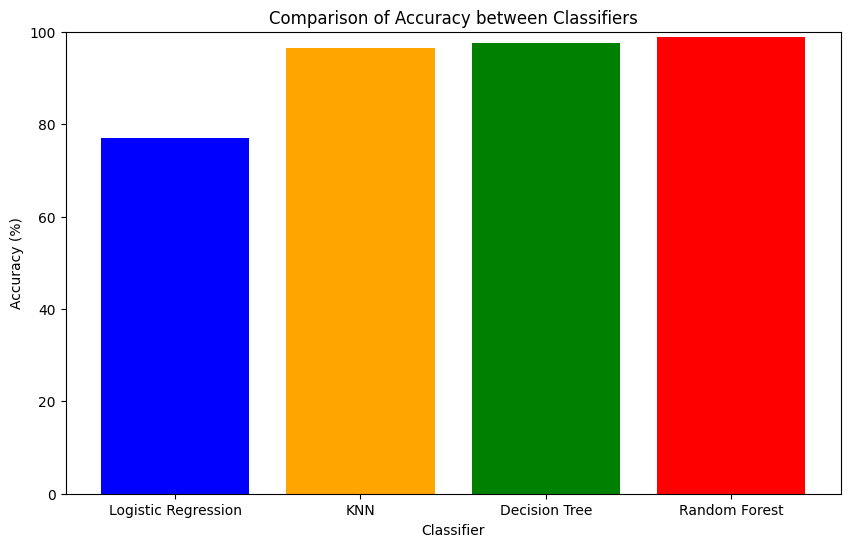

In [ ]:
# Create a DataFrame for accuracy comparison
accuracy_df = pd.DataFrame({
    'Classifier': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy (%)': [lor_accuracy, max(scores_list), dt_accuracy, rf_accuracy]
})

# Display the DataFrame
print(accuracy_df)

# Accuracy scores
accuracy_scores = {
    'Logistic Regression': lor_accuracy,
    'KNN': max(scores_list),  # Considering the maximum accuracy from the KNN scores
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy
}

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy between Classifiers')
plt.ylim(0, 100)  # Setting y-axis limit from 0 to 100
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Output: Employee will stay in company


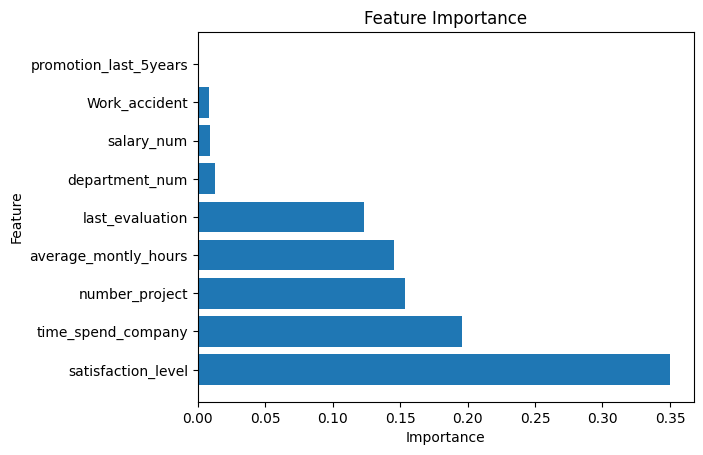

In [ ]:
# scince random forest classifier gas highest accuracy , this will be the final model
# Assuming you're interested in predicting the outcome
Outcome = ['Employee will stay in company', 'Employee will Leave the Company']

# Custom data for prediction
custom_data = [[1, 500, 6, 0, 0, 0.40, 0.89, 1, 3]]

# Predicting the outcome
predicted_output = Outcome[int(rf.predict(custom_data)[0])]
print("Predicted Output:", predicted_output)

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plotting feature importance
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


Confusion Matrix:
[[3397    5]
 [  50 1048]]


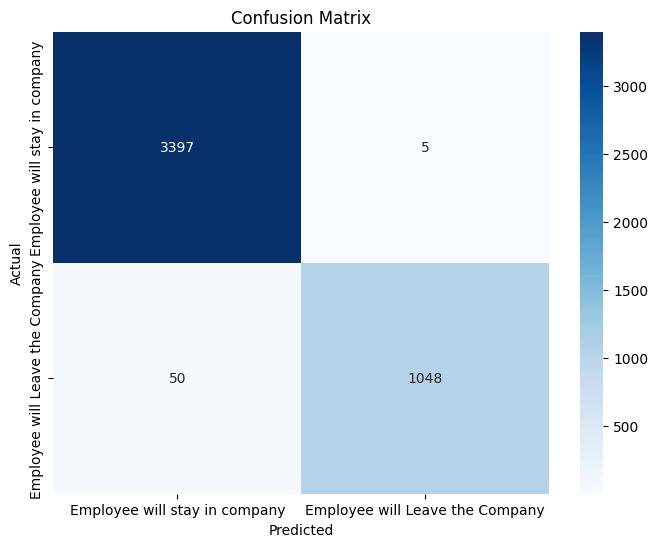

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, rf.predict(X_test))
print("Confusion Matrix:")
print(conf_matrix)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', xticklabels=Outcome, yticklabels=Outcome)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()